<a href="https://colab.research.google.com/github/GabrielCdev/titanic_disaster_analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade 01

Base para a atividade: https://www.kaggle.com/competitions/titanic/data

###....:::: Membros ::::....

Áureo Ramos

Gabriel Borges Calheiros

Izadora de Oliveira Machado Paim

Laianne Protásio

In [ ]:
# bibliotecas principais
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
# Carga dos dados .csv
titanic_df = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/titanic_disaster_analysis/main/titanic/train.csv')

In [ ]:
#Verificando início dos dados
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [ ]:
#Verificando final dos dados
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#Principais técnicas de pré-processamento de dados

1. Identificação de variáveis;
2. Análise de variáveis;
3. Tratamento de dados faltantes;
4. Tratamento de outliers;
5. Transformação de atributos;
6. Derivação de atributos;
7. Reamostragem;
8. Redução de dimensionalidade.

##Identificação de variáveis

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat - Lifeboat (if survived)

body - Body number (if did not survive and body was recovered)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Elementos contidos nos atributos

In [ ]:
titanic_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
titanic_df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
titanic_df.Survived.unique()

array([0, 1])

In [ ]:
titanic_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
titanic_df.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [ ]:
titanic_df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
titanic_df.Pclass.unique()

array([3, 1, 2])

In [ ]:
titanic_df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
titanic_df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [ ]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic_df.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

##Transformação dos tipos dos atributos

In [ ]:
titanic_df['Survived'] = titanic_df['Survived'].astype('boolean')
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')
titanic_df['Name'] = titanic_df['Name'].astype('string')
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
titanic_df['Cabin'] = titanic_df['Cabin'].astype('category')
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category')

##Derivação de Atributo

In [ ]:
#Derivação
titanic_df['Treatment pronouns'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_df['Treatment pronouns'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Treatment pronouns, dtype: int64

In [ ]:
titanic_df.insert(len(titanic_df.columns),'Relatives',np.nan)
titanic_df['Relatives'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['Relatives'] = titanic_df.Relatives.apply (lambda x: False if x == 0 else True)

In [ ]:
titanic_df['Relatives'].describe()

count       891
unique        2
top       False
freq        537
Name: Relatives, dtype: object

In [ ]:
sns.set_style("darkgrid")

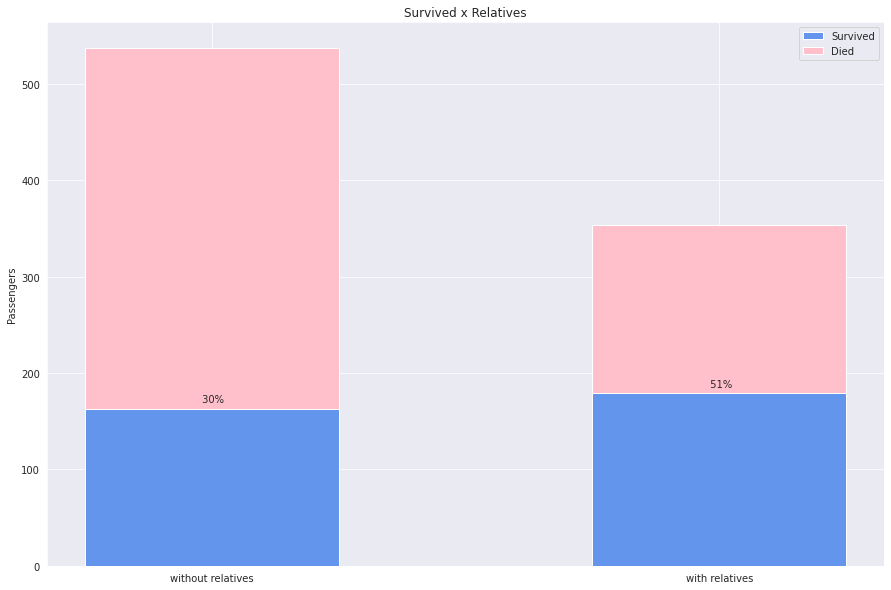

In [ ]:
sobreviventes = list(titanic_df.groupby(['Relatives','Survived'])['Survived'].count()[:,1])
mortos = list(titanic_df.groupby(['Relatives','Survived'])['Survived'].count()[:,0])
labels = ['without relatives','with relatives']

proporcao=[]
j=0
for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels
width = 0.5

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Relatives')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="top")

##Eliminando colunas

Excluiremos o atributo 'PassengerId' do datase, pois ele não possui correlação/dependência com o atributo target (Survived).

Os atributos 'Age' e 'Cabin' necessitarão de tratamento, pois apresentam dados ausentes e  possuem correlação/dependência com o atributo target.

In [ ]:
titanic_df.drop(columns='PassengerId', inplace=True)

In [ ]:
titanic_df.loc[titanic_df["Cabin"].isin(["C23 C25 C27"])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Treatment pronouns,Relatives
27,False,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,Mr,True
88,True,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,Miss,True
341,True,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,Miss,True
438,False,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,Mr,True


In [ ]:
#titanic_df.drop(columns=['Cabin', 'Ticket'], inplace=True)
titanic_df.drop(columns='Ticket', inplace=True)

In [ ]:
titanic_df.drop(columns=['Name'], inplace=True)

##Tratamento de dados faltantes

#Análise Exploratória

In [ ]:
titanic_df.isnull().sum()

Survived                0
Pclass                  0
Sex                     0
Age                   177
SibSp                   0
Parch                   0
Fare                    0
Cabin                 687
Embarked                2
Treatment pronouns      0
Relatives               0
dtype: int64

In [ ]:
titanic_df.describe()

,Survived,Age,SibSp,Parch,Fare
count,891,714.00,891.00,891.00,891.00
unique,2,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,NaN
freq,549,NaN,NaN,NaN,NaN
mean,NaN,29.70,0.52,0.38,32.20
std,NaN,14.53,1.10,0.81,49.69
min,NaN,0.42,0.00,0.00,0.00
25%,NaN,20.12,0.00,0.00,7.91
50%,NaN,28.00,0.00,0.00,14.45
75%,NaN,38.00,1.00,0.00,31.00


Atributo Classe

In [ ]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_df.groupby('Survived')['Pclass'].value_counts()

Survived   
False     3    372
          2     97
          1     80
True      1    136
          3    119
          2     87
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

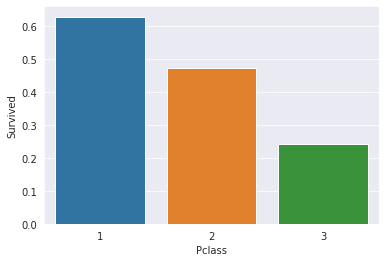

In [ ]:
sns.barplot(data=titanic_df, x="Pclass", y="Survived", ci=None)

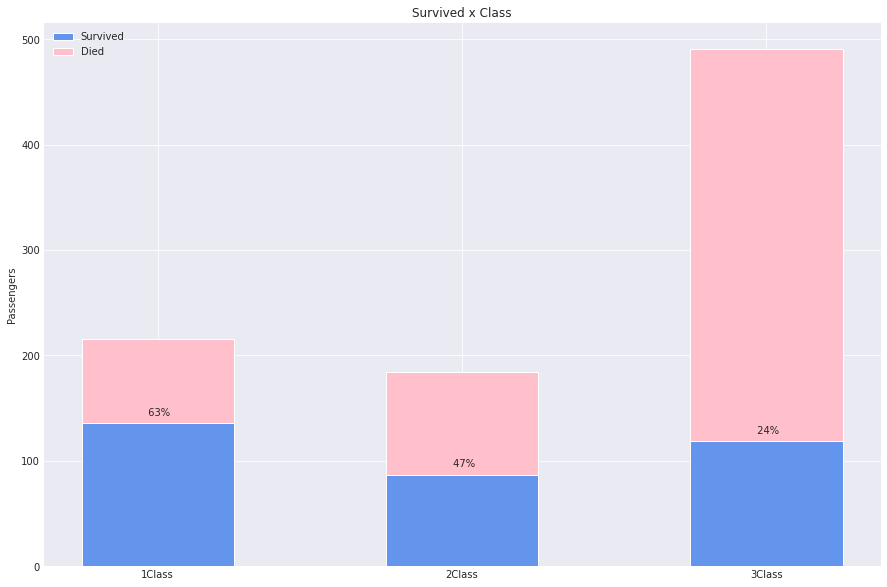

In [ ]:
sobreviventes = list(titanic_df.groupby(['Pclass','Survived'])['Survived'].count()[:,1])
mortos = list(titanic_df.groupby(['Pclass','Survived'])['Survived'].count()[:,0])
labels = ['1Class','2Class','3Class']

proporcao=[]
j=0
for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels
width = 0.5

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="top")

In [ ]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count().sort_values(by='Survived')

,Pclass,Survived
1,2,184
0,1,216
2,3,491


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

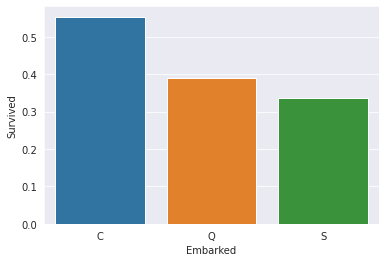

In [ ]:
sns.barplot(data=titanic_df, x="Embarked", y="Survived", ci=None)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

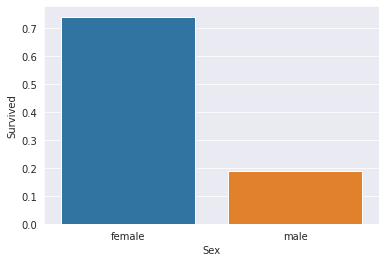

In [ ]:
sns.barplot(data=titanic_df, x="Sex", y="Survived", ci=None)

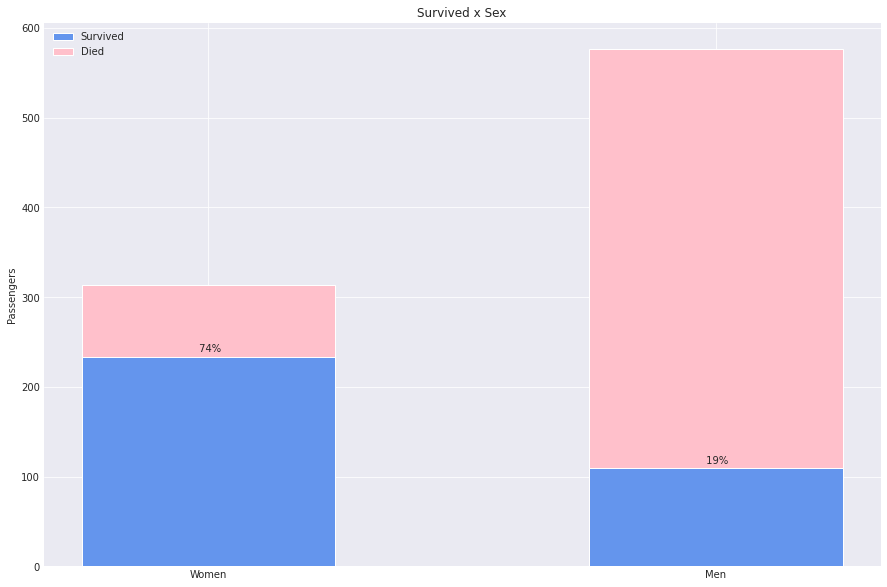

In [ ]:
sobreviventes = list(titanic_df.groupby(['Sex','Survived'])['Survived'].count()[:,1])
mortos = list(titanic_df.groupby(['Sex','Survived'])['Survived'].count()[:,0])
labels = ['Women','Men'] 

proporcao=[]
j=0
for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels
width = 0.5

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Sex')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="top")

Atributo Idade

In [ ]:
classes = [0, 5, 10, 18, 29, 100]

In [ ]:
labels = ['baby', 'children', 'young', 'adults', 'aged']

In [ ]:
classes = pd.cut(x=titanic_df.Age, bins=classes, labels=labels)

In [ ]:
titanic_df['Age'] = classes
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Treatment pronouns,Relatives
0,False,3,male,adults,1,0,7.25,NaN,S,Mr,True
1,True,1,female,aged,1,0,71.28,C85,C,Mrs,True
2,True,3,female,adults,0,0,7.92,NaN,S,Miss,False
3,True,1,female,aged,1,0,53.10,C123,S,Mrs,True
4,False,3,male,aged,0,0,8.05,NaN,S,Mr,False


In [ ]:
pd.value_counts(titanic_df.Age)

aged        330
adults      245
young        75
baby         44
children     20
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Survived'>

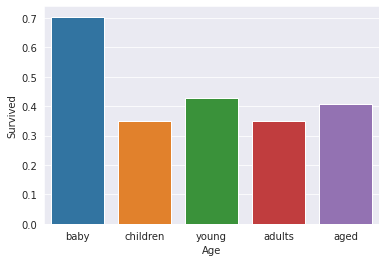

In [ ]:
sns.barplot(data=titanic_df, x="Age", y="Survived", ci=None)

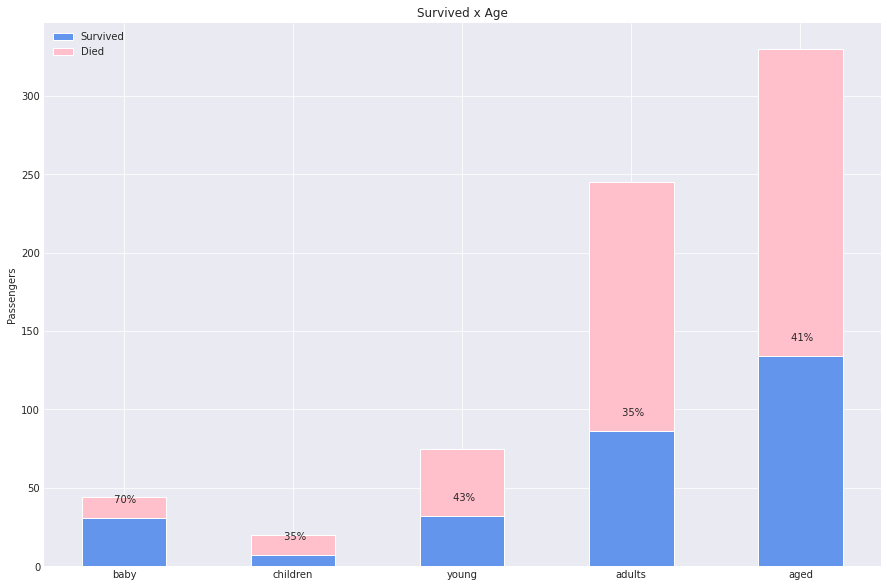

In [ ]:
sobreviventes = list(titanic_df.groupby(['Age','Survived'])['Survived'].count()[:,1])
mortos = list(titanic_df.groupby(['Age','Survived'])['Survived'].count()[:,0])
labels = ['baby', 'children', 'young', 'adults', 'aged']

proporcao=[]
j=0
for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels #np.arange(len(labels))  # posições em x
width = 0.5  # largura das barras

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Age')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao#[f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="top")

In [ ]:
titanic_df['Fare'] = pd.cut(titanic_df['Fare'], bins=[0, 8, 15, 30, 50, 100], labels=[1,2,3,4,5])

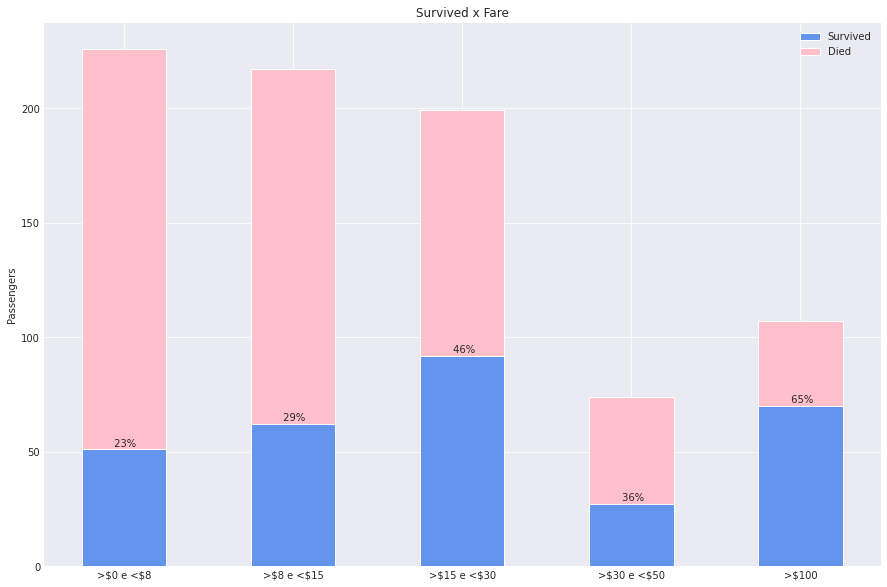

In [ ]:
sobreviventes = list(titanic_df.groupby(['Survived','Fare'])['Survived'].count()[1])
mortos = list(titanic_df.groupby(['Survived','Fare'])['Survived'].count()[0])
labels = ['>\$0 e <\$8','>\$8 e <\$15','>\$15 e <\$30','>\$30 e <\$50','>\$100']

proporcao=[]
j=0
for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels
width = 0.5

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Fare')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao#[f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="top")

In [ ]:
#Derivação
titanic_df.insert(10, 'Deck', np.nan)
titanic_df['Deck'] = titanic_df['Cabin'].dropna().apply (lambda x: x[0])

In [ ]:
titanic_df['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
titanic_df['Deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

In [ ]:
titanic_df.loc[titanic_df.Deck=='T','Deck'] = np.nan
#titanic_df['Deck'] = titanic_df['Deck'].dropna().apply (lambda x: ord(x)%32)

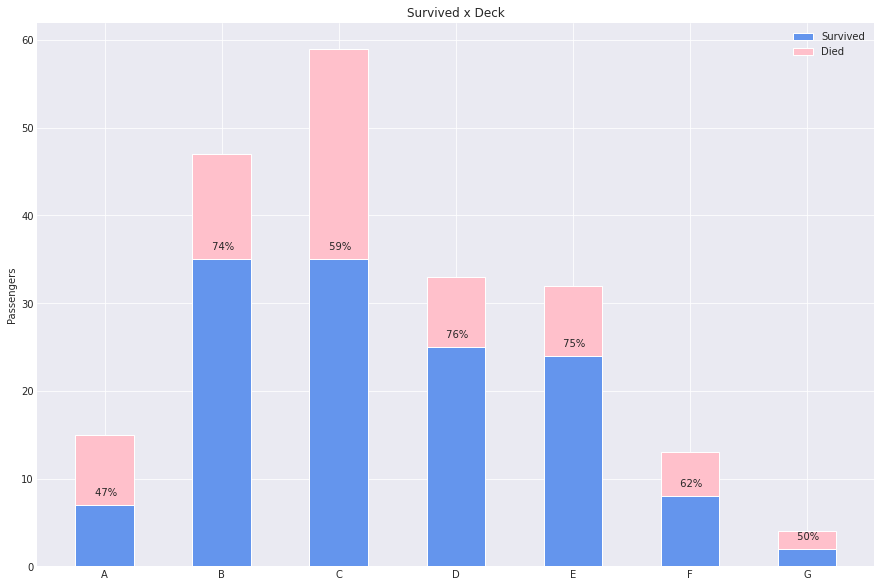

In [ ]:
sobreviventes = list(titanic_df.groupby(['Survived','Deck'])['Survived'].count()[1])
mortos = list(titanic_df.groupby(['Survived','Deck'])['Survived'].count()[0])
labels = ['A','B','C','D','E','F','G']

proporcao=[]
j=0
for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels
width = 0.5

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Deck')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao#[f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 2, label, ha="center", va="top")

Da análise do dataset titanic_train.csv, podemos inferir algumas considerações:

Há uma quantidade razoável de dados de Idade faltantes (20%) e uma quantidade alta de dados de Cabine faltantes (77%).

Do total de 891 induvíduos do dataset, 314 são mulheres e 577 homens.

A taxa de sobreviventes é de aproximadamente 38%, sendo a maioria mulheres.

A proporção de mulheres sobreviventes é maior que a dos homens (74% e 19%), respectivamente.

Com relação à faixa etária, a prevalência é de sobreviventes crianças pequenas e bebês (< 5 anos) e mulheres acima dos 12 anos.

Passageiros com parentes a bordo tiveram mais chances de sobrevivência.

Quanto mais alto o valor da tarifa, por consequência, a classe, maior a proporção de sobreviventes.

##Reamostragem